In [1]:
import numpy as np
import matplotlib.pyplot as pp

In [2]:
def myfunc(x,y):
    return (x**2 + y**2 + 1.5*x*y)

<a list of 9 text.Text objects>

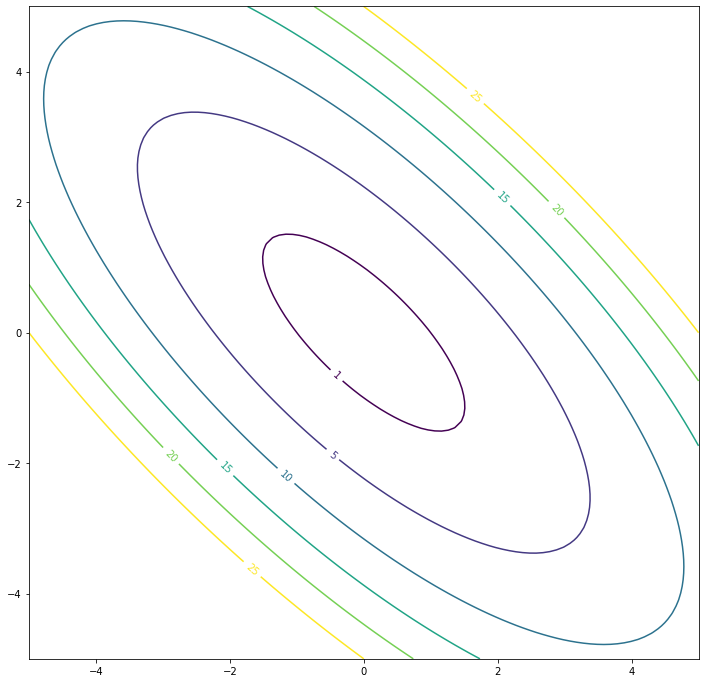

In [6]:
x,y = np.meshgrid( np.linspace(-5,5,100), np.linspace(-5,5,100) )
pp.figure(figsize=(12,12))
c = pp.contour(x, y, myfunc(x,y), [1,5,10,15,20,25])
pp.clabel(c)

In [9]:
nsteps = 100000
xchain = np.zeros(nsteps)
ychain = np.zeros(nsteps)
oldz = myfunc(0,0)
for i in range(1,nsteps):
    newx = xchain[i-1] + np.random.normal()
    newy = ychain[i-1] + np.random.normal()
    newz = myfunc(newx, newy)
    if (newz <= oldz):
        # accept
        xchain[i] = newx
        ychain[i] = newy
        oldz = newz
    else:
        if (np.random.rand() < np.exp(-0.5*(newz - oldz))):
            # accept
            xchain[i] = newx
            ychain[i] = newy
            oldz = newz
        else:
            # reject
            xchain[i] = xchain[i-1]
            ychain[i] = ychain[i-1]


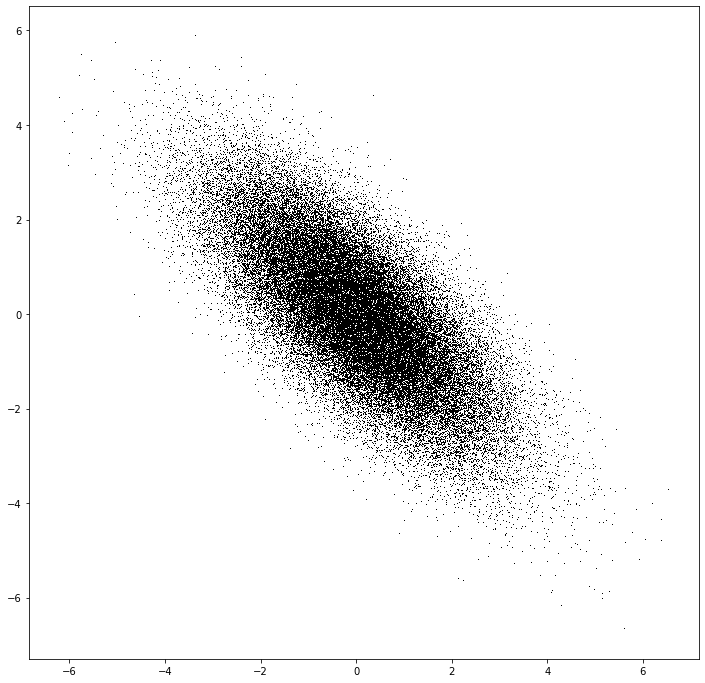

In [10]:
pp.figure(figsize=(12,12))
pp.plot(xchain, ychain, 'k,')

In [11]:
np.mean(xchain), np.std(xchain)

(2.0469973519365227e-02, 1.4936529910767309)

In [12]:
np.mean(ychain), np.std(ychain)

(-0.020872781892467118, 1.4890070438379075)

In [13]:
np.corrcoef(xchain, ychain)

array([[ 1.       , -0.7469172],
       [-0.7469172,  1.       ]])

(array([1.3000e+01, 1.8000e+01, 2.0000e+01, 6.8000e+01, 1.5900e+02,
        3.8800e+02, 7.6700e+02, 1.3850e+03, 2.4090e+03, 4.1150e+03,
        5.7400e+03, 7.4080e+03, 9.2170e+03, 1.0762e+04, 1.1084e+04,
        1.1205e+04, 9.7020e+03, 8.1780e+03, 6.4700e+03, 4.5100e+03,
        2.8510e+03, 1.7180e+03, 9.3700e+02, 4.5000e+02, 2.3700e+02,
        1.0600e+02, 5.5000e+01, 1.7000e+01, 6.0000e+00, 5.0000e+00]),
 array([-6.20789385, -5.78338693, -5.35888002, -4.9343731 , -4.50986619,
        -4.08535927, -3.66085236, -3.23634544, -2.81183853, -2.38733162,
        -1.9628247 , -1.53831779, -1.11381087, -0.68930396, -0.26479704,
         0.15970987,  0.58421679,  1.0087237 ,  1.43323062,  1.85773753,
         2.28224444,  2.70675136,  3.13125827,  3.55576519,  3.9802721 ,
         4.40477902,  4.82928593,  5.25379285,  5.67829976,  6.10280668,
         6.52731359]),
 <BarContainer object of 30 artists>)

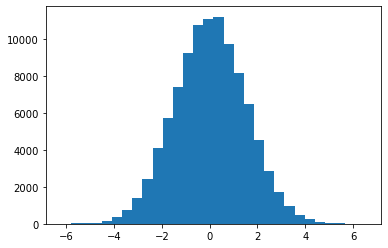

In [14]:
pp.hist(xchain, bins=30)